<a href="https://colab.research.google.com/github/manuel103/Machine-Learning/blob/master/ML_Lab_1_Group_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
m = 0
c = 0
L = 0.0001 # learning rate
epoch = 100
epoch_error_list = []
epoch_count_list = []

In [0]:
data = pd.read_csv('data.csv', header = 0)

In [0]:
X = data['size_in_sq_ft']
Y = data['price_x1000_sh']
N = float(len(X))
# print(N)

In [0]:
# from scipy.spatial import distance
# manhattan_distance = distance.cityblock(X, Y)

'''
Lasso regression
'''
hyper_param = 1.5
w = sum(abs(X-Y))
lasso_reg = hyper_param*w
# print('Mine:::',w)
# print('Lib:::', manhattan_distance)

'''
Ridge regression
'''
wr = (sum(abs(X-Y)))**2
ridge_reg = hyper_param*wr
# print(wr)

In [0]:
'''
def mse(N, Y, Y_hat):
  return (1/N)* sum(Y-Y_hat)**2 - lasso_reg # mse minus lasso regression
'''
def mse(N, Y, Y_hat):
  return (1/N)* sum(Y-Y_hat)**2 - ridge_reg # mse minus ridge regression

In [0]:
def gradient_descent_fit(m,c,N,L):
    epoch_error_list=[]
    epoch_count_list=[]
    
    for i in range(epoch):
        Y_hat = m*X+c
        # compute error for every iteration
        epoch_count_list=epoch_count_list[:]# get list instance
        epoch_count_list.append(i)
        epoch_error=mse(N,Y,Y_hat)
        epoch_error_list=epoch_error_list[:]
        epoch_error_list.append(epoch_error)

        #minimize the error function by computing partial derivatives
        D_m=(-2/N)*sum(X*(Y-Y_hat))
        D_c=(-2/N)*sum(Y-Y_hat)

        m=m-(L * D_m)
        c=c-(L * D_c)
        
    print("final m is: ",m," and final c is: ",c)
  #return final predicted value of Y-dependent variable
    return Y_hat,epoch_count_list,epoch_error_list

final m is:  1.4788027175308887  and final c is:  0.03507497059521459


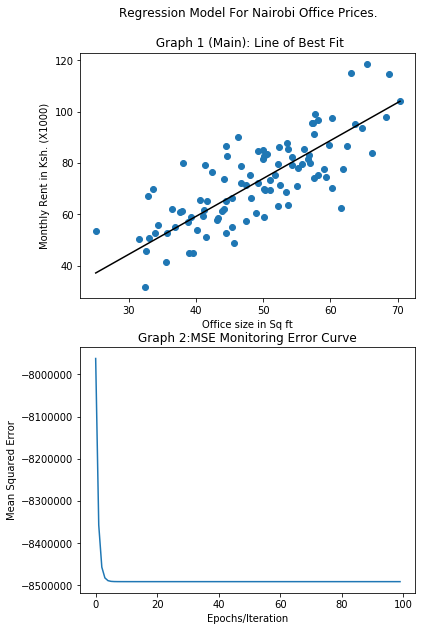

In [0]:
#call gradient descent fit function
returned_params=gradient_descent_fit(m,c,N,L)
y_predicted=returned_params[0]
total_epochs=returned_params[1]
all_epoch_errors=returned_params[2]

#create plot for both line of best fit and error reduction graphs
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw={'top':2})
ax1.set(xlabel="Office size in Sq ft")
ax1.set(ylabel="Monthly Rent in Ksh. (X1000)")
ax1.set_title("Regression Model For Nairobi Office Prices.\n\n Graph 1 (Main): Line of Best Fit")
ax1.scatter(X,Y)

ax1.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='black')
ax2.set_title("Graph 2:MSE Monitoring Error Curve")
ax2.set(xlabel="Epochs/Iteration")
ax2.set(ylabel="Mean Squared Error")
ax2.plot(total_epochs,all_epoch_errors)

epoch_count_list.clear()
epoch_error_list.clear()